# Ekstrak Dataset Kaggle

In [1]:
!pip install kaggle

In [5]:
kaggle = '/content/kaggle.json'

In [6]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.72GB/s]


In [9]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [11]:
data_0 = os.listdir('/content/0')
data_1 = os.listdir('/content/1')
data_2 = os.listdir('/content/2')
data_3 = os.listdir('/content/3')
data_4 = os.listdir('/content/4')
data_5 = os.listdir('/content/5')
data_6 = os.listdir('/content/6')
data_7 = os.listdir('/content/7')
data_8 = os.listdir('/content/8')

In [12]:
len(data_0)

2236

# Import Library

In [13]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Mengubah Data ke Numerik

In [14]:
data = []
labels = []

def load_images(file_list, label, folder_path):
    for file_name in file_list:
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = img.flatten()       # jadi data biasa
        img = img / 255.0         # normalisasi
        data.append(img)
        labels.append(label)

Memanggil fungsi tiap kelas

In [15]:
load_images(data_0, 0, '/content/0')
load_images(data_1, 1, '/content/1')
load_images(data_2, 2, '/content/2')
load_images(data_3, 3, '/content/3')
load_images(data_4, 4, '/content/4')
load_images(data_5, 5, '/content/5')
load_images(data_6, 6, '/content/6')
load_images(data_7, 7, '/content/7')
load_images(data_8, 8, '/content/8')

# Konversi ke Array

In [16]:
X = np.array(data)      # (jumlah_data, 784)
y = np.array(labels)

print(X.shape)
print(y.shape)

(19539, 784)
(19539,)


#  Encoding Label

In [17]:
y = to_categorical(y, 10)

# Split Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Membangun Model ANN (MLP)

In [19]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile Model

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training Model

In [21]:
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.1248 - loss: 2.2481 - val_accuracy: 0.2223 - val_loss: 2.1415
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1823 - loss: 2.1397 - val_accuracy: 0.2635 - val_loss: 2.0975
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2650 - loss: 2.0435 - val_accuracy: 0.2936 - val_loss: 1.9544
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3379 - loss: 1.9100 - val_accuracy: 0.2968 - val_loss: 1.9535
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3527 - loss: 1.8377 - val_accuracy: 0.3886 - val_loss: 1.7683
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4248 - loss: 1.7165 - val_accuracy: 0.4586 - val_loss: 1.6801
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4488 - loss: 1.6504 - val_accuracy: 0.4320 - val_loss: 1.6731
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4566 - loss: 1.6371 - val_accuracy: 0.4244 - val_loss

# Evaluasi Model

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5157 - loss: 1.4639
Test Accuracy: 0.51893550157547


# Classification Report

In [23]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.63      0.75      0.69       421
           1       0.49      0.66      0.56       473
           2       0.49      0.60      0.54       431
           3       0.65      0.44      0.52       476
           4       0.67      0.46      0.55       435
           5       0.67      0.26      0.37       416
           6       0.51      0.56      0.53       435
           7       0.35      0.64      0.45       405
           8       0.52      0.30      0.38       416

    accuracy                           0.52      3908
   macro avg       0.55      0.52      0.51      3908
weighted avg       0.55      0.52      0.51      3908



# Grafik Perbandingan

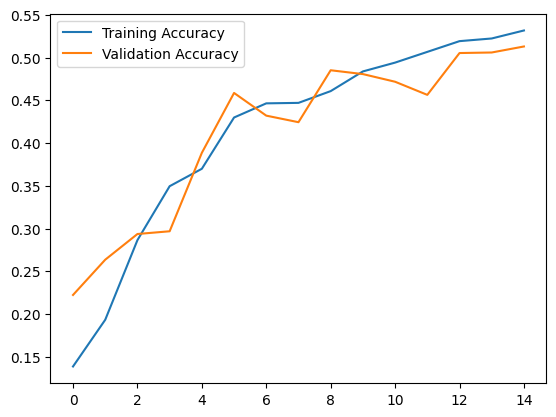

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()